In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# retrieve and import files
path = "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt"
df = pd.read_csv(path, sep=r"\s+", header=None, names=["index", "feature"])
feature_names = df.loc[0:119, "feature"].tolist()
print(feature_names)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [ ]:
# load features
X_train = pd.read_csv(
    "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt",
    sep=r"\s+", header=None, names=feature_names
)

X_test = pd.read_csv(
    "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt",
    sep=r"\s+", header=None, names=feature_names
)
y_train = pd.read_csv(
    "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt",
    header=None, names=["Activity"]
)

y_test = pd.read_csv(
    "/content/drive/MyDrive/Team Dropbox/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt",
    header=None, names=["Activity"]
)

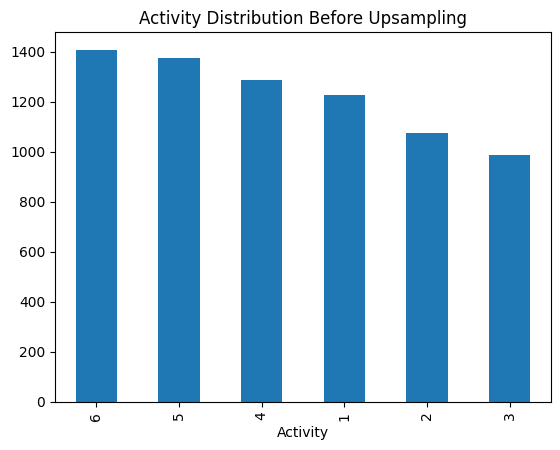

In [ ]:
# check class imbalance before resampling
y_train["Activity"].value_counts().plot(kind="bar")
plt.title("Activity Distribution Before Upsampling")
plt.show()

In [ ]:
# apply upsampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


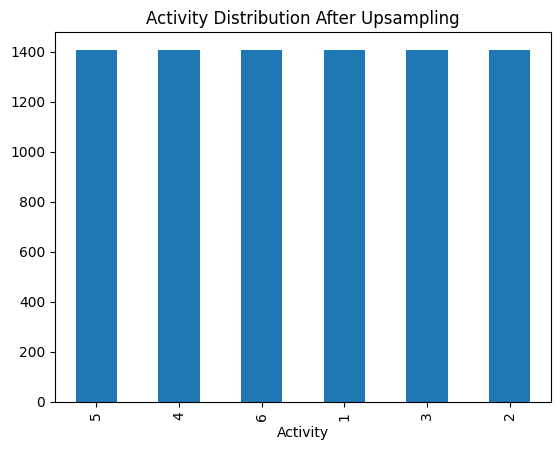

In [ ]:
# check outcome
y_resampled["Activity"].value_counts().plot(kind="bar")
plt.title("Activity Distribution After Upsampling")
plt.show()

In [ ]:
# train models
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000)
clf.fit(X_resampled, y_resampled.values.ravel())

# evaluate LR
from sklearn.metrics import classification_report
pred = clf.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.88      0.99      0.93       496
           2       0.93      0.89      0.91       471
           3       0.98      0.90      0.93       420
           4       0.95      0.84      0.89       491
           5       0.84      0.96      0.89       532
           6       1.00      0.95      0.98       537

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947

